In [4]:
import time
import FORTE.utils as utils
from FORTE.algorithms import Rank
import blackbox
import numpy as np
import matplotlib.pyplot as plt

ImportError: cannot import name NuclearNormPGD

Generate noisy triplet data from a more general logistic.

In [2]:
n = 30
d = 2
num_triplets = 20*d*n*np.log(n)

Xtrue = 5*np.random.randn(n, d)
Xtrue = Xtrue - 1. / n * np.dot(np.ones((n, n)),  Xtrue)
Mtrue = np.dot(Xtrue, Xtrue.transpose())

def biased_logistic(X, q):
    i,j,k = q
    r = 1/(2+np.exp(-5*utils.triplet_scoreX(X,q)))
    return r

# Train and test set
Strain = utils.triplets(Xtrue, num_triplets, biased_logistic)
Stest = utils.triplets(Xtrue, num_triplets, biased_logistic)

print "Bayes error rate train:", utils.empirical_lossX(Xtrue, Strain)
print "Bayes error rate test:", utils.empirical_lossX(Xtrue, Stest)

Bayes error rate train: 0.504778240627
Bayes error rate test: 0.515314873805


Now embed the points using normal logistic loss as the link and plot.

Empirical Training loss = 0.452095074737,Empirical Test loss = 0.49448664543


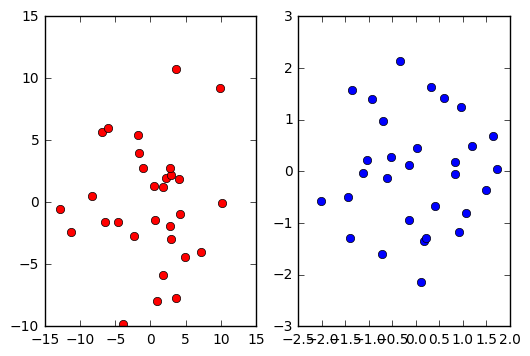

In [3]:
Xhat = FactoredGradient.computeEmbedding(n, d, Strain,
                                         num_random_restarts=0,
                                         max_num_passes_SGD=16, max_iter_GD=50,
                                         max_norm=1, epsilon=0.01, verbose=False)
print ('Empirical Training loss = {},' 
       'Empirical Test loss = {}').format(utils.empirical_lossX(Xhat, Strain),
                                          utils.empirical_lossX(Xhat, Stest))

_, Xpro, _ = utils.procrustes(Xtrue, Xhat)
plt.figure(1)
plt.subplot(121); plt.plot(*zip(*Xtrue), marker='o', color='r', ls='')
plt.subplot(122); plt.plot(*zip(*Xpro), marker='o', color='b', ls='')
plt.show()